# ANALYZE STRUCTURE OF OSCILLATORS

# Preliminaries

In [1]:
from analysis.summary_statistics import SummaryStatistics
from analysis.cluster_analyzer import ClusterAnalyzer
from analysis.result_accessor import ResultAccessor
import sirn.constants as cnn
import analysis.constants as cn

import os
import copy
import numpy as np
from sbmlnetwork import SBMLNetwork
import pandas as pd
import tellurium as te
from typing import List
import matplotlib.pyplot as plt

# Helpers

# Try SBMLNetwork

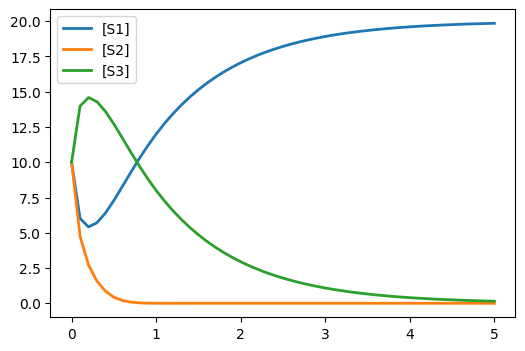

In [2]:
model = """
S1 + S2 -> S3; k1*S1*S2
S3 -> S1; k2*S3
S1 = 10
S2 = 10
S3 =10
k1 = 1
k2 = 1
"""
rr = te.loada(model)
rr.simulate()
rr.plot()

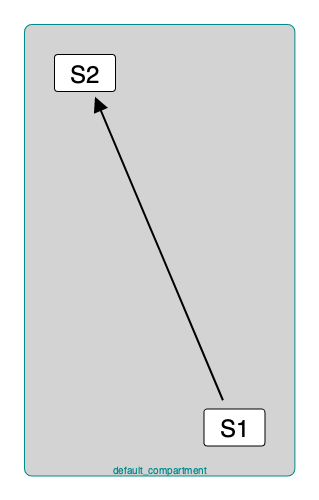

In [3]:
def drawModel(model):
    rr = te.loada(model)
    diagram = SBMLNetwork(rr.getSBML())
    diagram.autolayout()
    diagram.draw()

# Tests
model = """
S1 -> S2; S1
S1 = 0; S2 = 0
"""
drawModel(model)

In [4]:
model2 = model.replace("S", "B")
model2 = model2.replace("k", "kB")
model2 = model2.replace("B1", "BB")
model2 = model2.replace("B2", "B1")
model2 = model2.replace("BB", "B2")

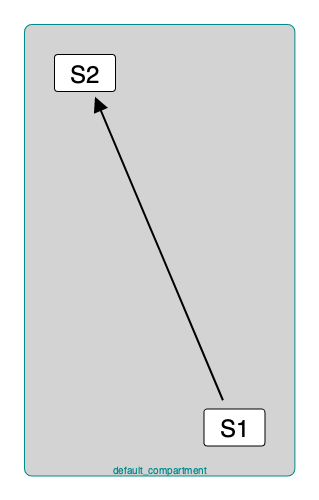

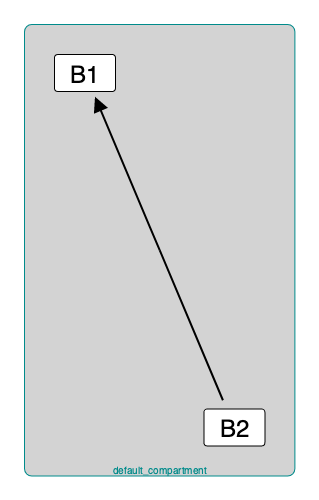

In [5]:
drawModel(model)
drawModel(model2)

# Basic Statistics

## Determined Structural Identity

In [6]:
# Effect of max_log_perm on June_10_B_10507

# Analyze Structurally Identical Files

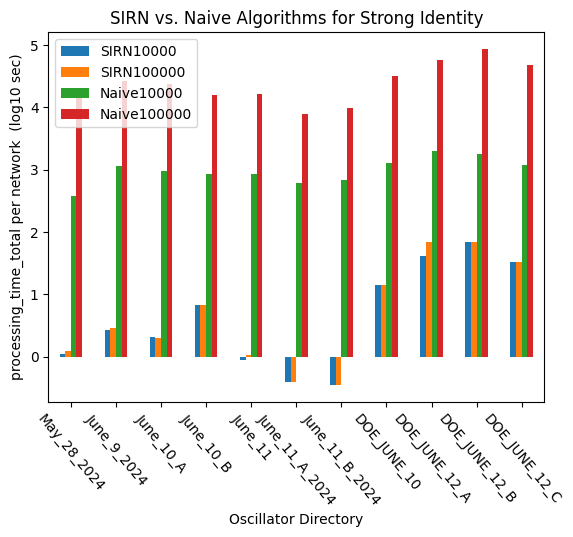

In [7]:
_ = SummaryStatistics.plotMetricByConditions("processing_time_total",
                identity_types = [True],
                max_num_perms = [10000, 100000],
                sirn_types = [True, False],
                is_log=True,
                legends=["SIRN10000", "SIRN100000", "Naive10000", "Naive100000"],
                title="SIRN vs. Naive Algorithms for Strong Identity"
                )

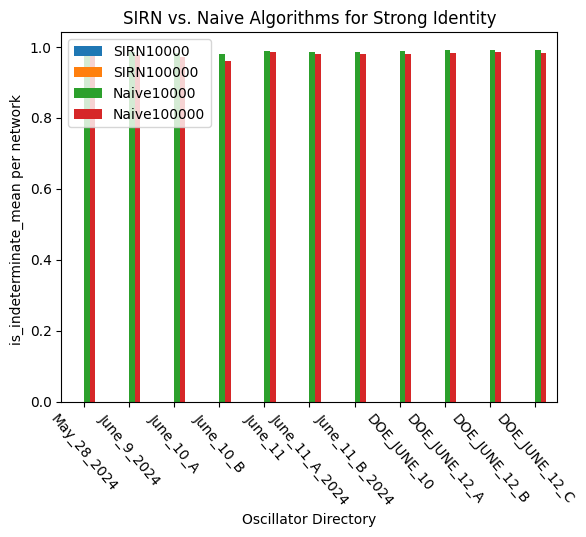

In [8]:
_ = SummaryStatistics.plotMetricByConditions("is_indeterminate_mean",
                identity_types = [True],
                max_num_perms = [10000, 100000],
                sirn_types = [True, False],
                is_log=False,
                legends=["SIRN10000", "SIRN100000", "Naive10000", "Naive100000"],
                title="SIRN vs. Naive Algorithms for Strong Identity"
                )

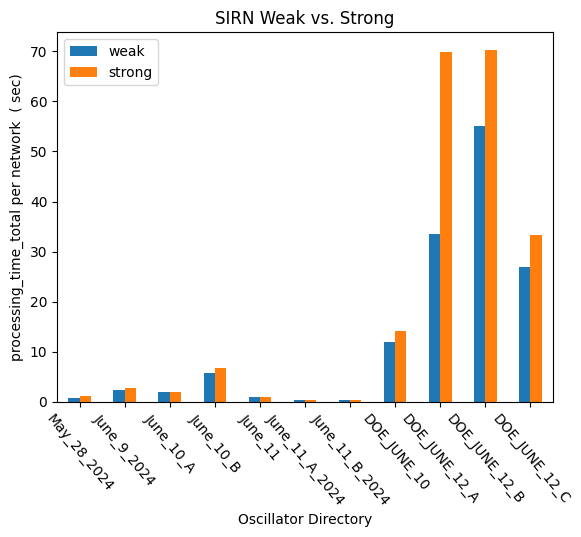

In [9]:
 _ = SummaryStatistics.plotMetricByConditions("processing_time_total",
                identity_types = [False, True],
                max_num_perms = [100000],
                sirn_types = [True],
                is_log=False,
                legends=["weak", "strong"],
                title="SIRN Weak vs. Strong"
                )

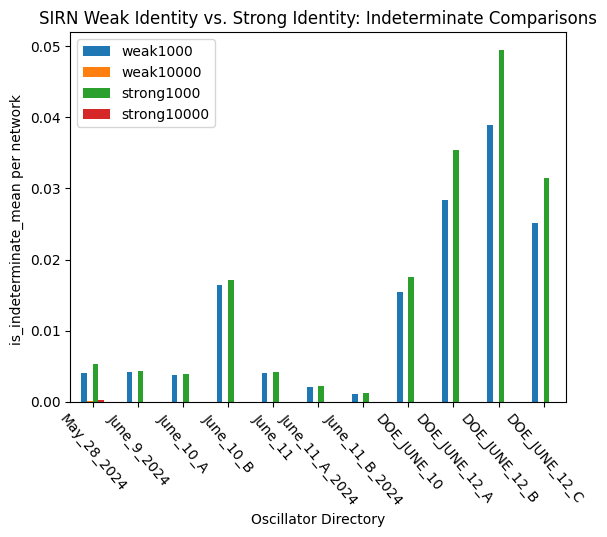

In [10]:
 _ = SummaryStatistics.plotMetricByConditions("is_indeterminate_mean",
                identity_types = [False, True],
                max_num_perms = [1000, 10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak1000", "weak10000", "strong1000", "strong10000"],
                title="Weak Identity vs. Strong Identity: SIRN Fraction Indeterminate Comparisons"
                )

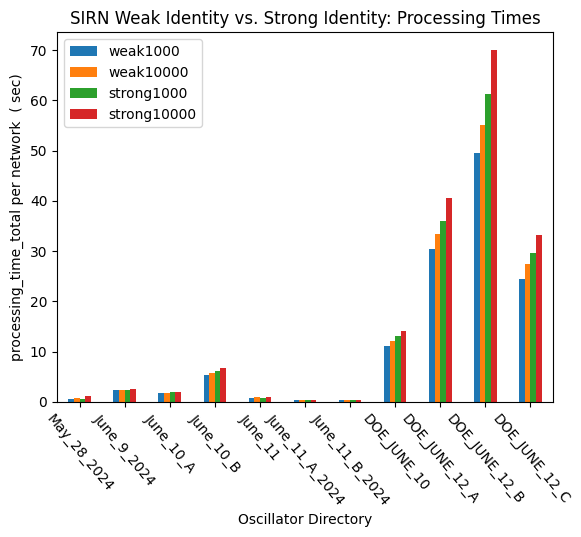

In [11]:
_ = SummaryStatistics.plotMetricByConditions("processing_time_total",
                identity_types = [False, True],
                max_num_perms = [1000, 10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak1000", "weak10000", "strong1000", "strong10000"],
                title="SIRN Weak Identity vs. Strong Identity: Processing Times"
                )

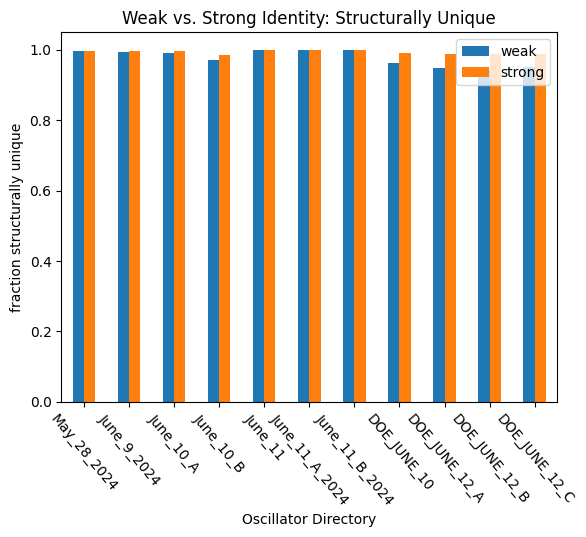

In [16]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_eq1_mean",
                identity_types = [False, True],
                max_num_perms = [10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak", "strong"],
                title="Fraction Structurally Unique",
                ylabel="fraction structurally unique",
                )

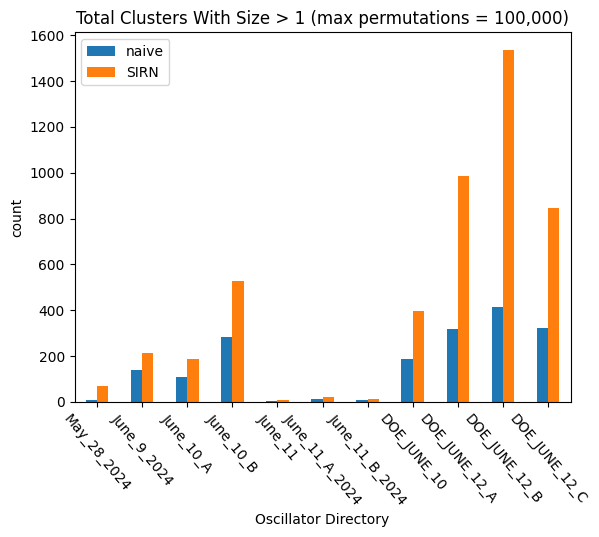

In [24]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_gt1_total",
                identity_types = [True],
                max_num_perms = [100000],
                sirn_types = [False, True],
                is_log=False,
                legends=["naive", "SIRN"],
                title="Total Clusters With Size > 1 (max permutations = 100,000)",
                ylabel="count",
                )

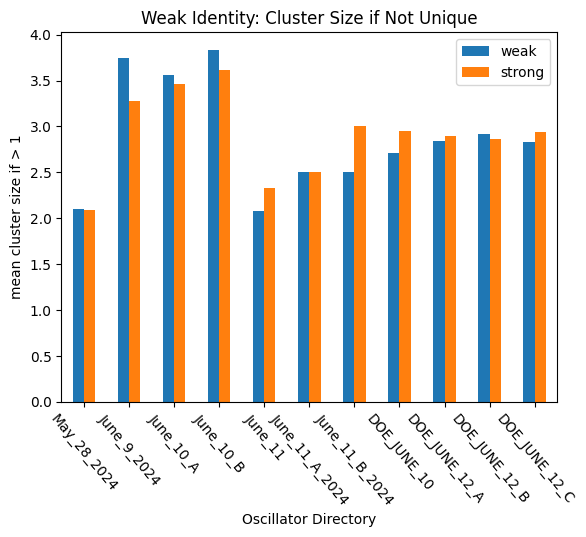

In [14]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_gt1_mean",
                identity_types = [False, True],
                max_num_perms = [10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak", "strong"],
                title="Cluster Size if Not Unique",
                ylabel="mean cluster size",
                )

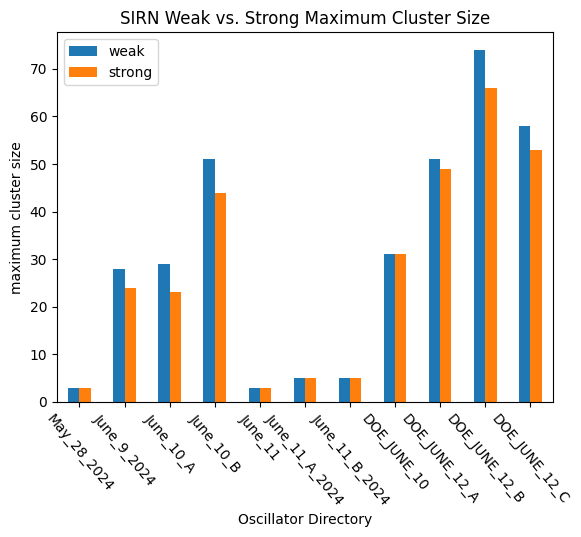

In [23]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_gt1_max",
                identity_types = [False, True],
                max_num_perms = [10000],
                sirn_types = [True],
                is_log=False,
                legends=["weak", "strong"],
                title="SIRN Weak vs. Strong Maximum Cluster Size",
                ylabel="maximum cluster size",
                )

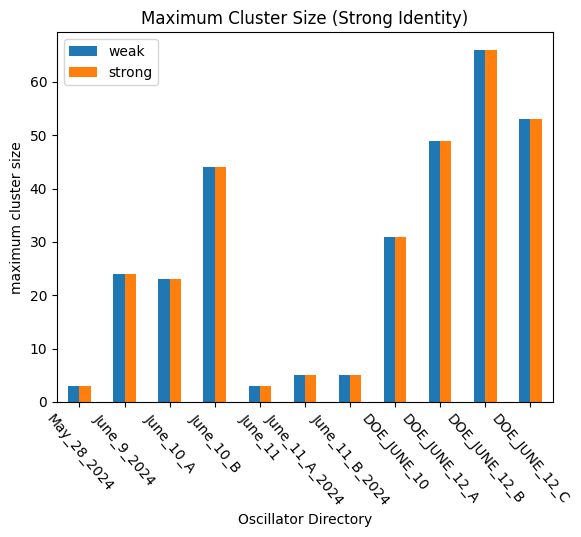

In [22]:
_ = SummaryStatistics.plotMetricByConditions("cluster_size_gt1_max",
                identity_types = [True],
                max_num_perms = [10000],
                sirn_types = [True, False],
                is_log=False,
                legends=["weak", "strong"],
                title="Maximum Cluster Size (Strong Identity)",
                ylabel="maximum cluster size",
                )